# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [251]:
train_data, test_data = [], []
train_labels, test_labels = [], []
for i in range(1, 41):
    random_face = random.randint(1, 10)
    for j in range(1, 11):
        image_path = "ATnT/s{}/{}.pgm".format(i, j)
        image = np.array(Image.open(image_path).convert('L'), 'f')
        if j == random_face:
            test_data.append(image.flatten())
            test_labels.append(i)
        else:    
            train_data.append(image.flatten())
            train_labels.append(i)
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [252]:
train_data.shape

(360, 10304)

(360, 10304) (40, 10304)


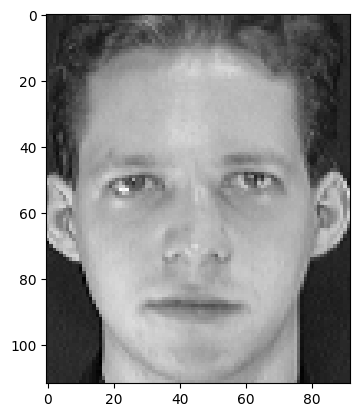

In [305]:
print(train_data.shape, test_data.shape)
plt.imshow(train_data[0].reshape(112, 92), cmap='gray')

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [355]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
def principalComponentAnalysis(X, number_of_components):
    n = number_of_components
    mean = np.mean(X, axis=0)
    centered = X-mean
    U, S, V = np.linalg.svd(centered)
    print(U.shape, S.shape, V.shape, X.shape)
    components = V[:n]
    projected = U[:,:n]*S[:n]
    
    return projected, components, mean
P, C, M= principalComponentAnalysis(train_data, 360)

(360, 360) (360,) (10304, 10304) (360, 10304)


(360, 360) (360, 10304) (10304,)


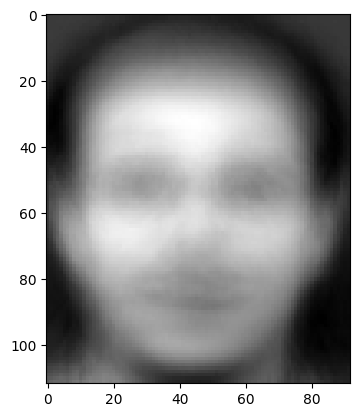

In [478]:
plt.imshow(M.reshape(112, 92), cmap='gray')
print(P.shape, C.shape, M.shape)

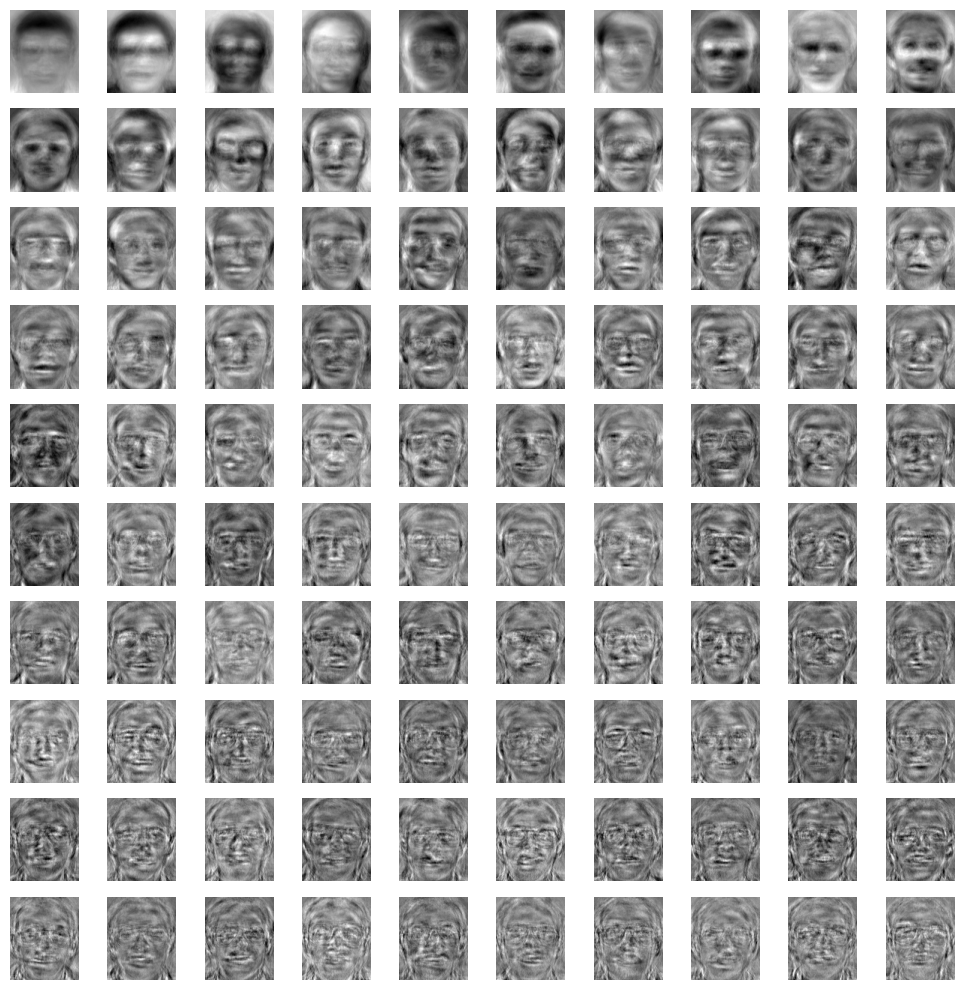

In [346]:
n = 100
fig, axs = plt.subplots(nrows=n//10, ncols=10, figsize=(10, n//10))
for i in range(n):
    row = i // 10
    col = i % 10
    axs[row, col].imshow(C[i].reshape(112, 92), cmap='gray')
    axs[row, col].axis('off')
    
plt.tight_layout()
plt.show()

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [347]:
# Function to implement image reconstruction by taking arguements as necessary.
def imageReconstruction(weights, components, mean, n):
  reconstructed_images = []
  #n = first n number of components(eigen faces) we are using to reconstruct the face
  components = components[:n]
  #only take weights for the first n components
  weights = weights[:,:n]
  #for each image(no of images = no of weights)
  for i in range(len(weights)):
    weight = weights[i]
    #multiply the eigen faces with each of their corresponding weights and add it up 
    #to get the corresponding reconsructed image which is reshaped into its 2D format.
    reconstrucetd_image = (weight@components+mean).reshape(112, 92)
    #append to the array of reconstructed images
    reconstructed_images.append(reconstrucetd_image)
  return np.array(reconstructed_images)

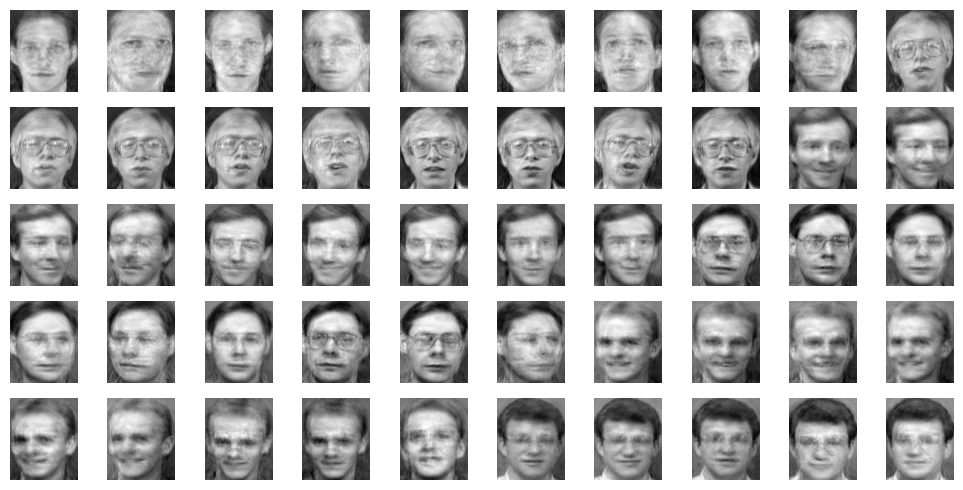

In [353]:
nc=100
reconstructed_images =  imageReconstruction(P, C, M, nc)
reconstructed_images.shape
n = 50
fig, axs = plt.subplots(nrows=n//10, ncols=10, figsize=(10, n//10))
for i in range(n):
    row = i // 10
    col = i % 10
    axs[row, col].imshow(reconstructed_images[i], cmap='gray')
    axs[row, col].axis('off')
    
plt.tight_layout()
plt.show()

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

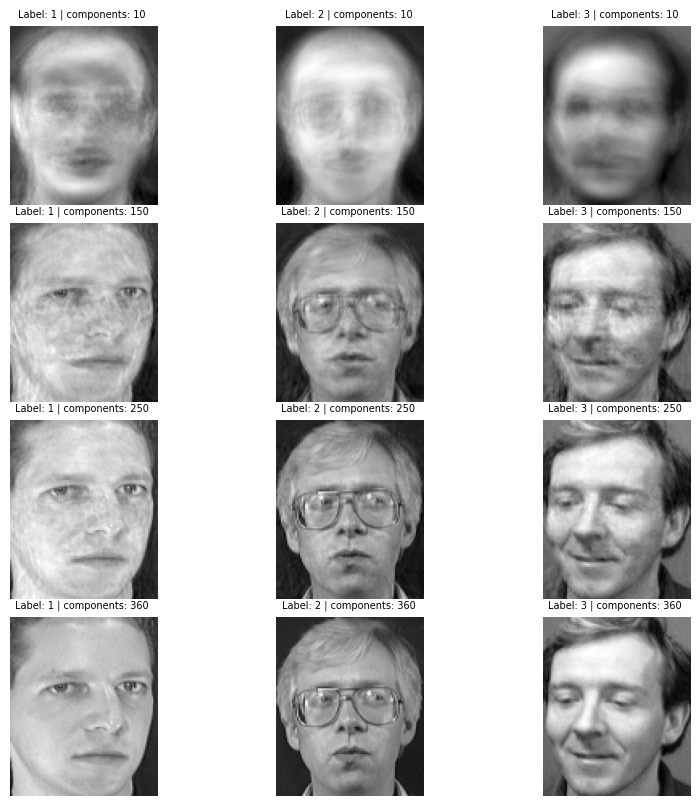

In [361]:
# set the number of components
n_components = [10, 150, 250, 360]
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
for j in range(3):
    for i in range(4):
        nc = n_components[i]
        
        reconstructed_images = imageReconstruction(P, C, M, nc)
        offset = j*10+1
        axs[i, j].set_title(f"Label: {train_labels[offset]} | components: {nc} ", fontsize=7)
        axs[i, j].axis('off')
        axs[i, j].imshow(reconstructed_images[offset], cmap='gray')
        axs[i, j].imshow(reconstructed_images[offset], cmap='gray')
        axs[i, j].imshow(reconstructed_images[offset], cmap='gray')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

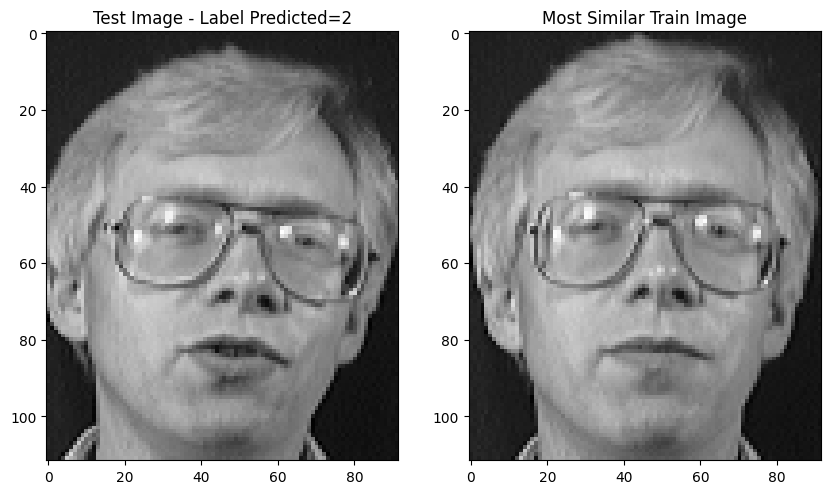

(array([[37., 35., 35., ..., 34., 34., 36.],
        [36., 36., 37., ..., 35., 31., 36.],
        [38., 36., 37., ..., 35., 32., 33.],
        ...,
        [42., 43., 39., ..., 24., 29., 26.],
        [34., 44., 43., ..., 26., 29., 27.],
        [36., 43., 36., ..., 26., 28., 28.]], dtype=float32),
 [13667.06, 9.522744],
 2)

In [514]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def mse(original_image, reconstructed_image):
    return np.mean((original_image - reconstructed_image) ** 2)

def log_mse(original_image, reconstructed_image):
    mse = np.mean(np.square(original_image - reconstructed_image))
    log_mse = np.log(mse)
    return log_mse
    
def model(test_image, trained_weights, eigenfaces, mean_eigenface, trainSet, plot=""):
  train_data, train_labels = trainSet
  normalized_test = (test_image-mean_eigenface)
  weights = eigenfaces@normalized_test
  mse_errors = []
  lmse_errors = []
  for weight in trained_weights:
      mse_errors.append(mse(weight, weights))
      lmse_errors.append(log_mse(weight, weights))
  idx = np.argmin(mse_errors)
  labl = train_labels[idx]
  similar_image = train_data[idx].reshape(112, 92)
  
  if plot=="img":
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
    axs[0].set_title(f"Test Image - Label Predicted={labl}")
    axs[0].imshow(test_image.reshape(112, 92), cmap='gray')
    axs[1].set_title("Most Similar Train Image")
    axs[1].imshow(similar_image, cmap='gray')
    plt.show()
  elif plot=="txt":
    print(f"mse-error={mse_errors[idx]} log-mse-error={lmse_errors[idx]} label= {labl}")
  return similar_image, [mse_errors[idx], lmse_errors[idx]], labl

model(test_data[1], P, C, M, [train_data, train_labels], "img")

# test_label 40 and 5 confuses the algo
# for n_comp=360 and test-image=39 actual-label=40 wrongly-labelled-as=5
# n=360
# model(test_data[39], P[:,:n], C[:n], M, [train_data, train_labels], "img")

In [527]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""
no_components = [1, 10, 20, 50, 100, 150, 200, 300, 360]
mse_list = []
lmse_list = []
for n in no_components:
    wrong_labels=0
    mse_errors = []
    lmse_errors = []
    for i in range(len(test_data)):
        test_image = test_data[i]
        sim_img, errors, label = model(test_image, P[:,:n], C[:n], M, [train_data, train_labels])
        mse_errors.append(errors[0])
        lmse_errors.append(errors[1])
        if label!=test_labels[i]:
            # print(f"for n_comp={n} and test-image={i} actual-label={test_labels[i]} wrongly-labelled-as={label}")
            wrong_labels+=1
            # fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
            # axs[0].set_title(f"Test Image - Label Predicted={label}")
            # axs[0].imshow(test_image.reshape(112, 92), cmap='gray')
            # axs[1].set_title("Most Similar Train Image")
            # axs[1].imshow(test_data[label-1].reshape(112, 92), cmap='gray')
            # plt.show()
    mse_list.append(np.mean(np.array(mse_errors)))
    lmse_list.append(np.mean(np.array(lmse_errors)))
        
    print(f"accuracy for n={n} is: {(len(test_data)-wrong_labels)/len(test_data)}")

print(mse_list, lmse_list)


accuracy for n=1 is: 0.15
accuracy for n=10 is: 1.0
accuracy for n=20 is: 1.0
accuracy for n=50 is: 0.975
accuracy for n=100 is: 0.975
accuracy for n=150 is: 0.975
accuracy for n=200 is: 0.975
accuracy for n=300 is: 0.975
accuracy for n=360 is: 0.975
[109.40094, 74712.94, 60686.324, 40518.414, 28816.746, 22817.45, 19070.207, 14608.615, 12729.932] [2.850699, 10.836748, 10.648489, 10.334712, 10.050228, 9.851157, 9.694794, 9.457945, 9.331657]


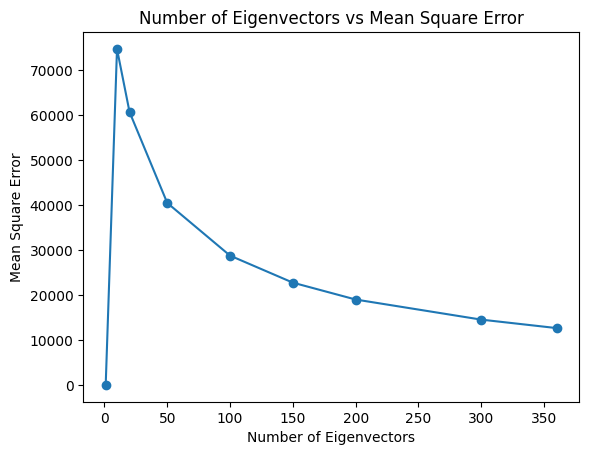

In [528]:
# Plot Number of eigenvectors vs Mean Square Error
plt.plot(no_components, mse_list, '-o')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Mean Square Error')
plt.title('Number of Eigenvectors vs Mean Square Error')
plt.show()

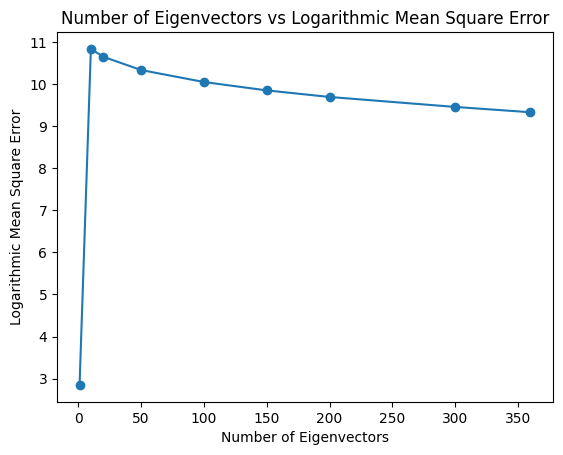

In [529]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
plt.plot(no_components, lmse_list, '-o')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Logarithmic Mean Square Error')
plt.title('Number of Eigenvectors vs Logarithmic Mean Square Error')
plt.show()

Summarise your observations on the plots and accuracies

**Answer:**

Based on the accuracy values, it seems that the accuracy is high for most of the n values, with the exception of n=1, where the accuracy is only 0.15. The accuracy remains relatively constant for n>=10, with a slight decrease for n=50 and n=100, but then remains constant again for larger values of n.

Based on the MSE and LMSE values, it seems like the reconstruction error decreases as the number of eigenfaces n increases. This is expected, as using more eigenfaces allows for a better approximation of the original image. Additionally, the logarithmic mean squared error seems to decrease at a slower rate compared to the mean squared error.

Overall, it seems like using n=10 or larger is sufficient for achieving high accuracy in the predictions, with relatively low reconstruction error. However, the choice of n will also depend on the specific application and the trade-off between accuracy and computational complexity.

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**

## Advantages of PCA:

    Reduces the dimensionality of the data and extracts the most important features.
    Removes noise and redundant information.
    Speeds up machine learning algorithms by reducing the number of features.
    Can be used for data visualization and exploration.

## Limitations of PCA:

    The new dimensions obtained after PCA may be difficult to interpret and explain.
    PCA is a linear technique and may not work well with nonlinear relationships between variables.
    The output of PCA depends on the scaling of the data, and hence, it is important to normalize the data before applying PCA.
    PCA may not always improve the performance of a machine learning algorithm, especially if the original dataset is already well-suited for the task.

## Limitations of PCA in face recognition:

    PCA assumes that the input data is linearly correlated and normally distributed. However, face images are inherently nonlinear and the distribution of pixel intensities may not be normal.
    The performance of PCA in face recognition may be affected by variations in illumination, pose, and facial expressions. PCA may not be able to handle these variations well, and may result in misclassification.
    PCA assumes that the number of training samples is much larger than the number of features. However, in face recognition, the number of features (pixels) is much larger than the number of training samples, and hence, the performance of PCA may be affected.